In [1]:
import os
import pandas as pd
import numpy as np
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

# 데이터 확인

In [2]:
df = pd.read_csv('./data/chapter28_game.csv')
df.shape

(90189, 5)

In [3]:
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


# 데이터 EDA & 전처리

In [4]:
df['version'].unique()

array(['gate_30', 'gate_40'], dtype=object)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


In [17]:
df.describe()

,userid,sum_gamerounds
count,9.018900e+04,90189.000000
mean,4.998412e+06,51.872457
std,2.883286e+06,195.050858
min,1.160000e+02,0.000000
25%,2.512230e+06,5.000000
50%,4.995815e+06,16.000000
75%,7.496452e+06,51.000000
max,9.999861e+06,49854.000000


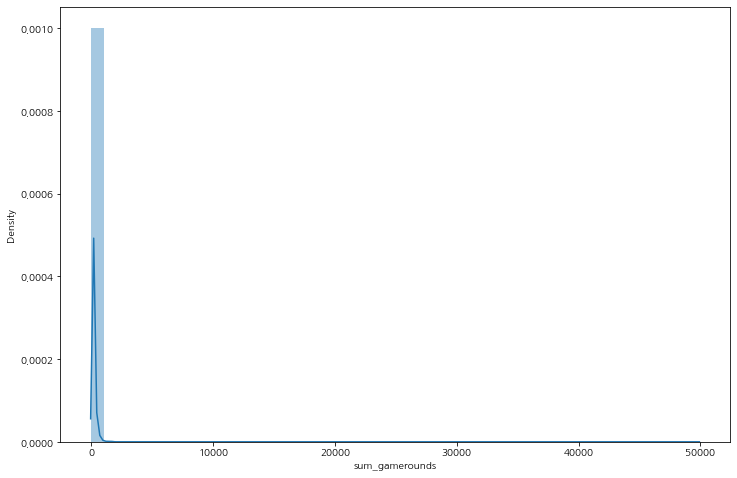

In [5]:
plt.figure(figsize=(12, 8))
sns.distplot(df['sum_gamerounds'])
plt.show()

In [8]:
df[df['sum_gamerounds'] > 2000]

,userid,version,sum_gamerounds,retention_1,retention_7
6536,725080,gate_40,2015,True,True
7912,871500,gate_30,2961,True,True
29417,3271615,gate_40,2640,True,False
36933,4090246,gate_40,2124,True,True
43671,4832608,gate_30,2438,True,True
46344,5133952,gate_30,2251,True,True
48188,5346171,gate_40,2294,True,True
57702,6390605,gate_30,49854,False,True
87007,9640085,gate_30,2156,True,True
88328,9791599,gate_40,2063,True,True


In [10]:
df[df['sum_gamerounds'] < 1000].describe()

,userid,sum_gamerounds
count,9.007100e+04,90071.000000
mean,4.998348e+06,49.655316
std,2.883295e+06,90.832957
min,1.160000e+02,0.000000
25%,2.511803e+06,5.000000
50%,4.995815e+06,16.000000
75%,7.496434e+06,51.000000
max,9.999861e+06,997.000000


In [15]:
# 결측치는 없다
df.isnull().sum()

userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

In [16]:
df.skew()

userid             -0.001290
sum_gamerounds    185.436313
retention_1         0.220493
retention_7         1.613430
dtype: float64

In [18]:
df['retention_1'].value_counts()

False    50036
True     40153
Name: retention_1, dtype: int64

In [19]:
df['retention_7'].value_counts()

False    73408
True     16781
Name: retention_7, dtype: int64

- version은 30, 40 두 가지

In [13]:
df['version'].unique()

array(['gate_30', 'gate_40'], dtype=object)

### data 분포